In [1]:
from subpred.protein_go_datasets import get_transmembrane_transporter_dataset, get_stats

## Full dataset

In [2]:
dataset_athaliana = get_transmembrane_transporter_dataset(  # athaliana
    organism_ids=[3702],
    swissprot_only=False,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=False,
    max_sequence_evidence_code=2,
    remove_proteins_without_gene_names=False,
)
get_stats(*dataset_athaliana)

cd-hit: clustered 1773 sequences into 646 clusters at threshold 50
cd-hit: clustered 1773 sequences into 923 clusters at threshold 70
cd-hit: clustered 1773 sequences into 1203 clusters at threshold 90
cd-hit: clustered 1773 sequences into 1554 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence   protein_existence_evidence clustering                   
False              False         computational protein_level              100                      3   
                                                                          None                     3   
                                               transcript_level           50                       3   
                                                                          70                       4   
                                                                          90                       7   
                                                                          100                     37   
                                                                          None                    49   
                   True          computational protein_level              50                      87   
                                                                          70                     114   
                                                                          90                     153   
                                                                          100                    329   
                                                                          None                   433   
                                               transcript_level           50                       7   
                                                                          70                      13   
                                                                          90                      19   
                                                                          100                     84   
                                                                          None                   164   
                                 experiment    protein_level              50                      25   
                                                                          70                      33   
                                                                          90                      38   
                                                                          100                     41   
                                                                          None                    42   
                                               transcript_level           50                       3   
                                                                          70                       5   
                                                                          90                       5   
                                                                          100                      6   
                                                                          None                     6   
True               True          computational protein_level              50                     206   
                                                                          70                     287   
                                                                          90                     370   
                                                                          100                    408   
                                                                          None                   418   
                                               transcript_level           50                     208   
                                                                          70                     338   
                                                                          90                     462   
                                                                          100                    492   
                                                                          None                   504   
                              

## Filtered Subset

In [3]:
dataset_athaliana = get_transmembrane_transporter_dataset(  # athaliana
    organism_ids=[3702],
    swissprot_only=True,
    datasets_path="../data/datasets/",
    exclude_iea_go_terms=True,
    max_sequence_evidence_code=1,
    remove_proteins_without_gene_names=True,
)
get_stats(*dataset_athaliana)

cd-hit: clustered 420 sequences into 276 clusters at threshold 50
cd-hit: clustered 420 sequences into 344 clusters at threshold 70
cd-hit: clustered 420 sequences into 403 clusters at threshold 90
cd-hit: clustered 420 sequences into 419 clusters at threshold 100


n_transporters  \
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering                   
True               True          experiment  protein_level              50                     276   
                                                                        70                     344   
                                                                        90                     403   
                                                                        100                    419   
                                                                        None                   420   

                                                                                    n_terms  
swissprot_reviewed has_gene_name go_evidence protein_existence_evidence clustering           
True               True          experiment  protein_level              50              264  
                                                                        70              281  
                                                                        90              288  
                                                                        100             288  
                                                                        None            288

## Sugar/Amino subset

In [4]:
dataset_athaliana[1]

,Uniprot,qualifier,go_id,go_term,evidence_code,aspect,go_id_ancestor,go_term_ancestor
0,A0MFS9,enables,GO:0005254,chloride channel activity,IBA,F,GO:0005253,monoatomic anion channel activity
1,A0MFS9,enables,GO:0005254,chloride channel activity,IBA,F,GO:0015108,chloride transmembrane transporter activity
2,A0MFS9,enables,GO:0005254,chloride channel activity,IBA,F,GO:0005216,monoatomic ion channel activity
3,A0MFS9,enables,GO:0005254,chloride channel activity,IBA,F,GO:0015267,channel activity
4,A0MFS9,enables,GO:0005254,chloride channel activity,IBA,F,GO:0015318,inorganic molecular entity transmembrane trans...
...,...,...,...,...,...,...,...,...
6485,Q9ZWT3,enables,GO:0005315,phosphate transmembrane transporter activity,ISS,F,GO:0022804,active transmembrane transporter activity
6486,Q9ZWT3,enables,GO:0005315,phosphate transmembrane transporter activity,ISS,F,GO:0005315,phosphate transmembrane transporter activity
6487,Q9ZWT3,enables,GO:0005315,phosphate transmembrane transporter activity,ISS,F,GO:0015291,secondary active transmembrane transporter act...
6488,Q9ZWT3,enables,GO:0005315,phosphate transmembrane transporter activity,ISS,F,GO:0015103,inorganic anion transmembrane transporter acti...


In [ ]:
from subpred.dataset_filters import get_proteome_classification_subset
dataset_athaliana = get_proteome_classification_subset(dataset_full=dataset_athaliana, go_term="amino acid transmembrane transporter activity")
                                                       
            #                                            go_terms=[
            #     "sugar transmembrane transporter activity",
            #     "amino acid transmembrane transporter activity",
            # ])

print("before clustering:")
dataset_athaliana[1].go_term_ancestor.value_counts()

before clustering:


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    388
sugar transmembrane transporter activity           32
Name: count, dtype: int64

In [6]:
from subpred.dataset_filters import filter_no_3Di_available

dataset_athaliana = filter_no_3Di_available(dataset_athaliana)
dataset_athaliana[1].go_term_ancestor.value_counts()

go_term_ancestor
!!NOT|sugar transmembrane transporter activity    386
sugar transmembrane transporter activity           32
Name: count, dtype: int64

Clustering at 70%

In [7]:
from subpred.dataset_filters import cluster_sequences
dataset_athaliana = cluster_sequences(dataset_full=dataset_athaliana, identity_threshold=70)
dataset_athaliana[1].go_term_ancestor.value_counts()

cd-hit: clustered 418 sequences into 342 clusters at threshold 70


go_term_ancestor
!!NOT|sugar transmembrane transporter activity    316
sugar transmembrane transporter activity           26
Name: count, dtype: int64

## Feature generation

In [8]:
from subpred.features import get_features
features_list, series_labels = get_features(dataset_full=dataset_athaliana, include_pssm_features=False)

2025-05-26 18:34:10.580949: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-26 18:34:10.586620: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748277250.592211  610569 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748277250.594164  610569 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-26 18:34:10.601193: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Index(['O04036', 'O04249', 'P23586', 'Q0WWW9', 'Q39228', 'Q6AWX0', 'Q6NQN5',
       'Q84WN3', 'Q8GX78', 'Q8L9J7',
       ...
       'Q9ZPJ8', 'Q9ZQ89', 'Q9ZR72', 'Q9ZSR7', 'Q9ZT63', 'Q9ZTZ7', 'Q9ZUA5',
       'Q9ZUU9', 'Q9ZV24', 'Q9ZWT3'],
      dtype='object', name='Uniprot', length=342)
Index(['O04036', 'O04249', 'P23586', 'Q0WWW9', 'Q39228', 'Q6AWX0', 'Q6NQN5',
       'Q84WN3', 'Q8GX78', 'Q8L9J7',
       ...
       'Q9ZPJ8', 'Q9ZQ89', 'Q9ZR72', 'Q9ZSR7', 'Q9ZT63', 'Q9ZTZ7', 'Q9ZUA5',
       'Q9ZUU9', 'Q9ZV24', 'Q9ZWT3'],
      dtype='string', name='Uniprot', length=342)


For each Feature: Outlier detection, numpy conversion 

In [9]:
from subpred.features import get_ml_datasets
ml_datasets = get_ml_datasets(features_list=features_list, series_labels=series_labels)
ml_datasets

[('DUMMY',
  array([[0.5488135 , 0.71518937, 0.60276338, ..., 0.6204999 , 0.63962224,
          0.9485403 ],
         [0.77827617, 0.84834527, 0.49041991, ..., 0.94382759, 0.68678337,
          0.28757538],
         [0.76899892, 0.08316477, 0.97477442, ..., 0.40850912, 0.08875799,
          0.55057892],
         ...,
         [0.4884459 , 0.35452363, 0.4443116 , ..., 0.83628479, 0.56133432,
          0.35848567],
         [0.23086892, 0.13270462, 0.83262941, ..., 0.26779029, 0.18243   ,
          0.69146333],
         [0.81084506, 0.24860643, 0.49328833, ..., 0.20270607, 0.00419284,
          0.05594515]], shape=(342, 1024)),
  array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

did the class assignment work correctly?

In [10]:
from collections import Counter
for feature_name, X, y, sample_names, feature_names in ml_datasets:
    assert Counter(y)[0] == dataset_athaliana[1].go_term_ancestor.value_counts()["!!NOT|sugar transmembrane transporter activity"]
    assert Counter(y)[1] == dataset_athaliana[1].go_term_ancestor.value_counts()["sugar transmembrane transporter activity"]

In [11]:
# saving as pickle, to load in different notebook with different env, 
# as tensorflow on GPU has problems with current CUDA version (too new)
import pickle
with open("../data/tmp_data/ml_data_at_sugarvsrest.pickle", 'wb') as handle:
    pickle.dump(ml_datasets, handle)

# with open("../data/tmp/ml_data_at_sugaramino.pickle", "rb") as handle:
#     ml_datasets_from_pickle = pickle.load(handle)

## Outliers

In [12]:
from subpred.evaluation import outlier_check

outlier_check(dataset_full=dataset_athaliana,ml_datasets=ml_datasets, threshold=0.8)

,outlier_count,protein_names,go_term_ancestor


## Model evaluation SVM

In [13]:
ml_datasets = [
    (feature_name, X, y, sample_names, feature_names)
    for feature_name, X, y, sample_names, feature_names in ml_datasets
    if "KMER3" not in feature_name
]

In [14]:
for feature_name, X, y, sample_names, feature_names in ml_datasets:
    print(feature_name)

DUMMY
AAC
PAAC
3Di_COMP
3Di_KMER2
COMB_KMER1
COMB_KMER2
PROTT5_AA
PROSTT5_AA
PROSTT5_3DI


=== DUMMY ===


Nested crossvalidation: 0.47+-0.05
=== AAC ===
Nested crossvalidation: 0.83+-0.08
=== PAAC ===
Nested crossvalidation: 0.91+-0.07
=== 3Di_COMP ===
Nested crossvalidation: 0.90+-0.04
=== 3Di_KMER2 ===
Nested crossvalidation: 0.95+-0.04
=== COMB_KMER1 ===
Nested crossvalidation: 0.88+-0.08
=== COMB_KMER2 ===
Nested crossvalidation: 0.94+-0.08
=== PROTT5_AA ===
Nested crossvalidation: 0.94+-0.08
=== PROSTT5_AA ===
Nested crossvalidation: 0.97+-0.04
=== PROSTT5_3DI ===
Nested crossvalidation: 0.99+-0.01


,median_val,std_val
Feature Name,,
DUMMY,0.492188,0.059164
AAC,0.836508,0.085403
COMB_KMER1,0.844444,0.087079
3Di_COMP,0.896825,0.039900
PAAC,0.914062,0.081755
PROTT5_AA,0.984127,0.084269
PROSTT5_AA,0.984127,0.045420
PROSTT5_3DI,0.984127,0.009065
3Di_KMER2,0.984375,0.049259


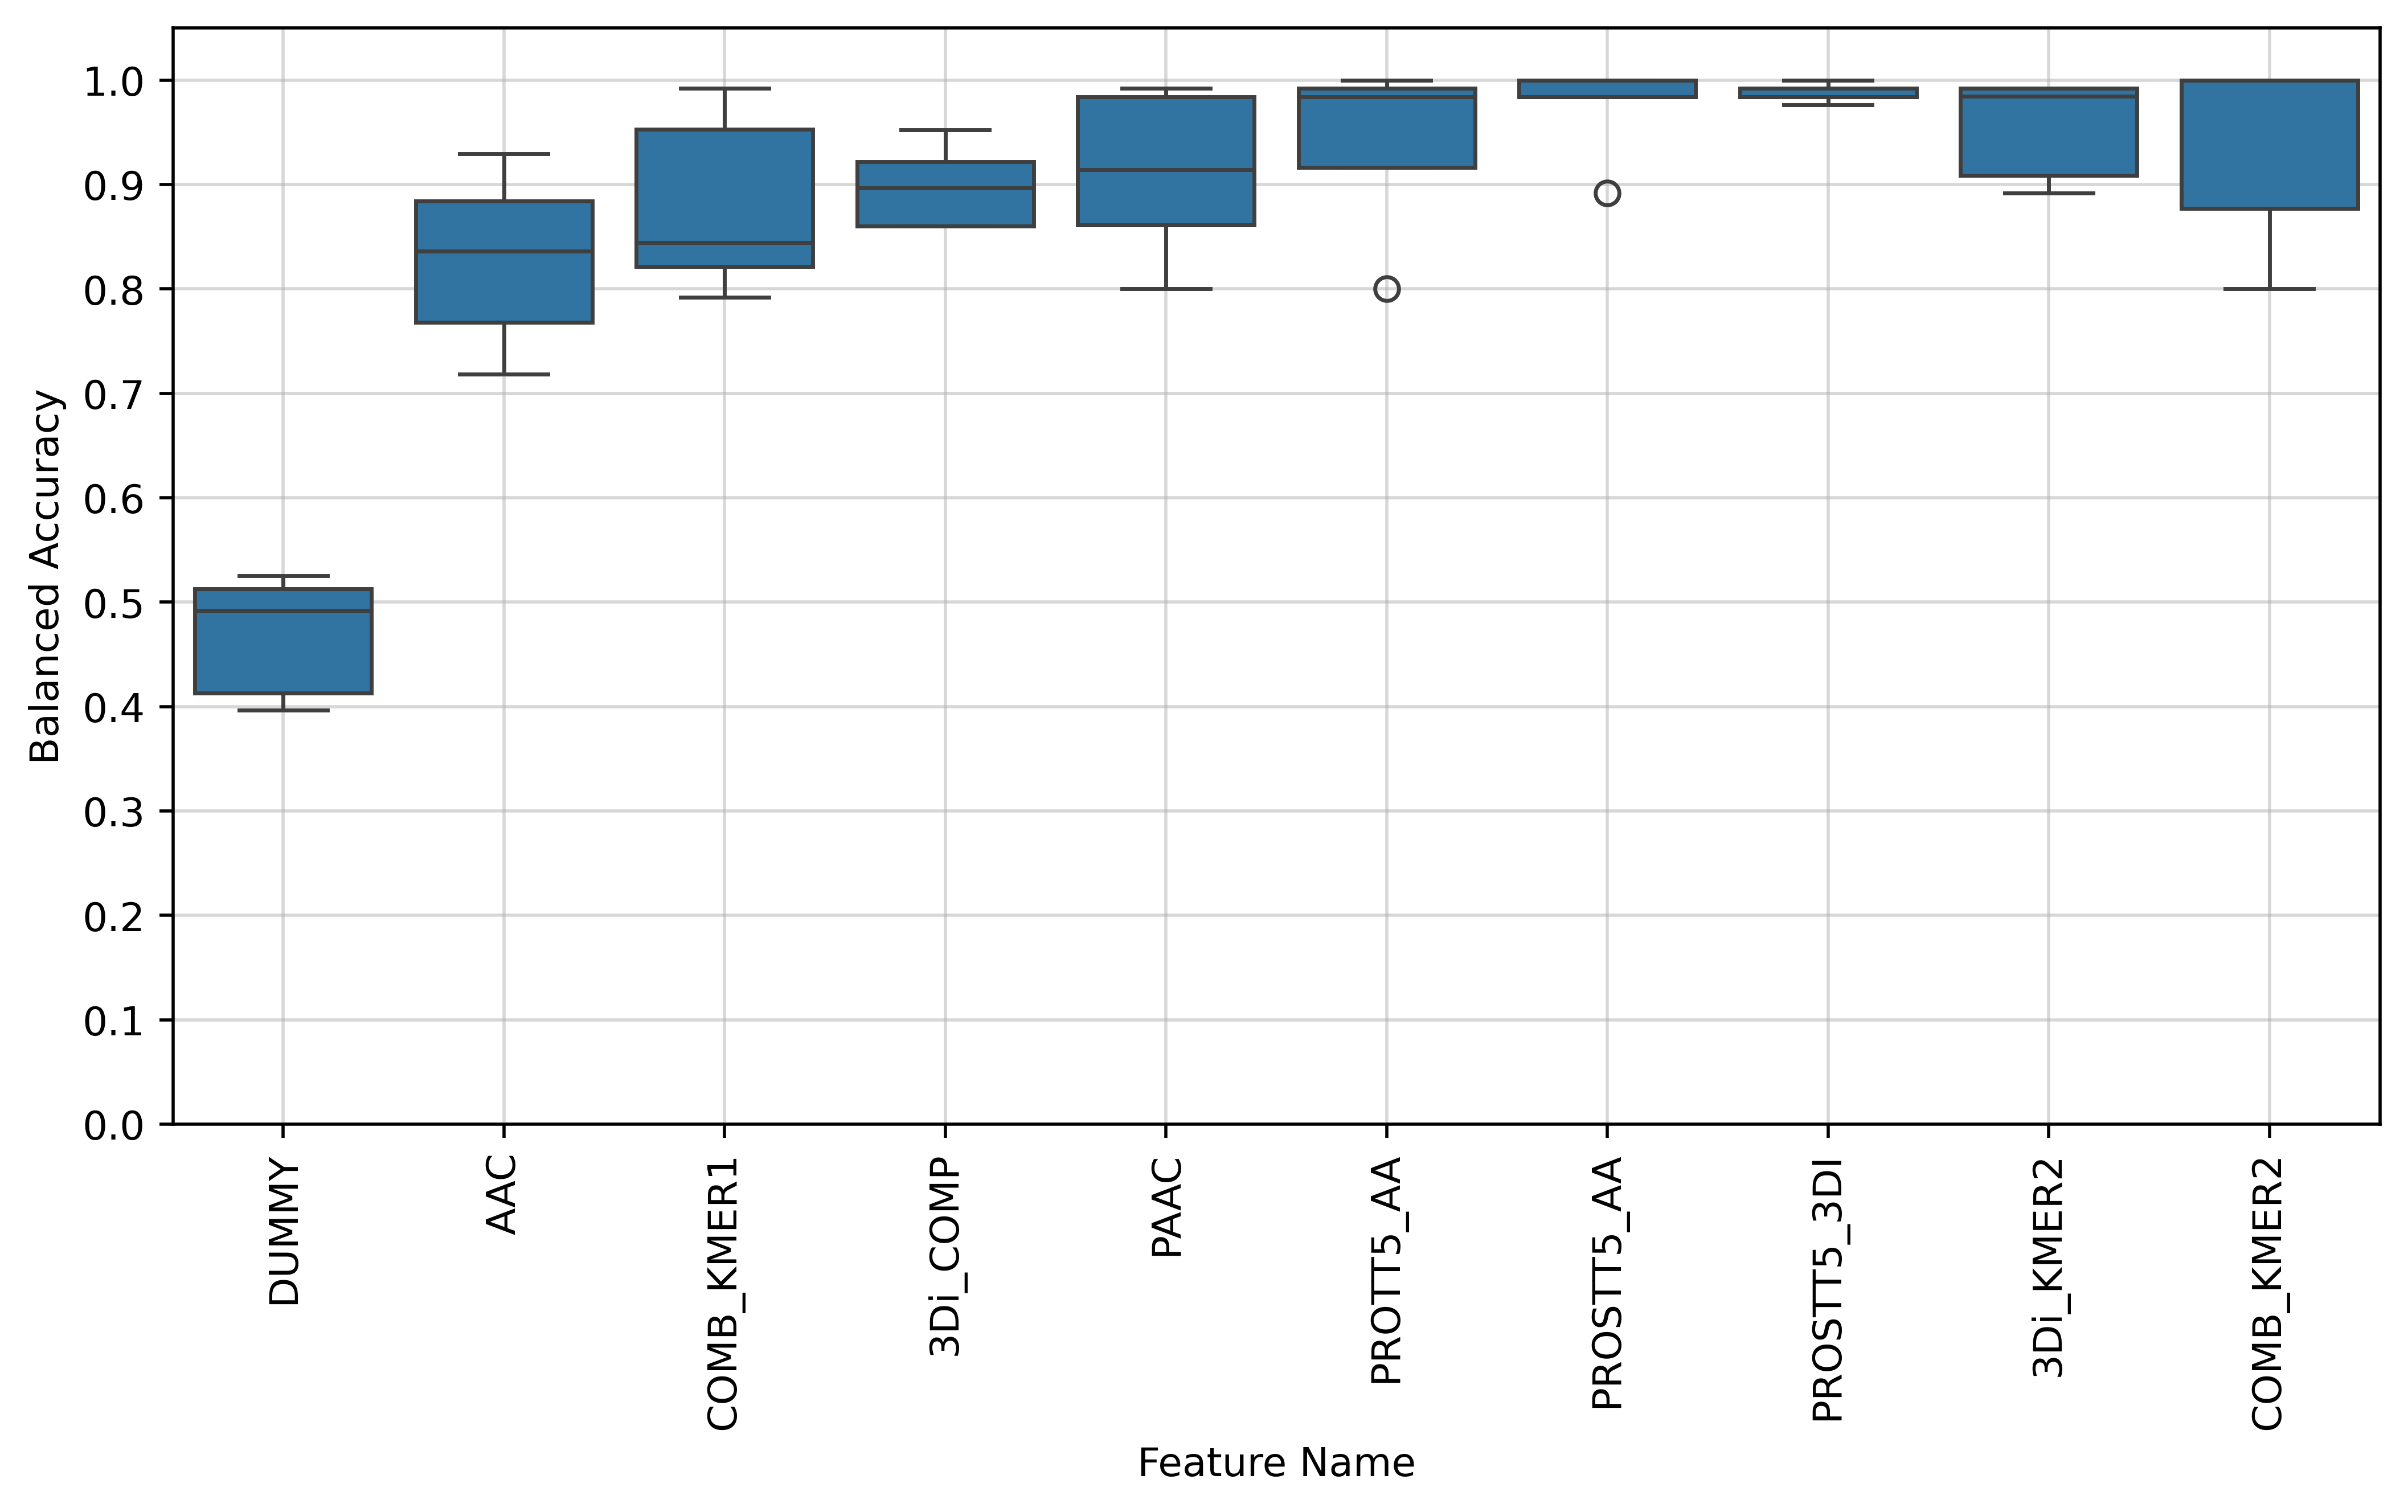

In [15]:
from subpred.evaluation import get_svm_results, plot_results_long

RESULTS_FOLDER = "../data/results/"
TEST_NAME = "svc_athaliana_sugar_ovr"
RECALCULATE = True
# TODO try recall

df_results_long = get_svm_results(
    ml_datasets=ml_datasets,
    recalculate=RECALCULATE,
    output_folder=RESULTS_FOLDER,
    test_name=TEST_NAME,
    repeats=1,
    n_jobs_inner=-1,
    n_jobs_outer=1
)
plot_results_long(
    df_results_long=df_results_long,
    output_folder_path=RESULTS_FOLDER,
    test_name=TEST_NAME,
)

In [16]:
# TODO other metrics, like one-sided recall?